In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# MobileNet 모델 불러오기 (사전 학습된 가중치 사용)
model = MobileNet(weights='imagenet')

In [3]:
# 예제 이미지 로드 및 전처리
img_path = '../data/_test_0.png'  # 사용할 이미지 경로 설정

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)


In [4]:
# 이미지 예측
preds = model.predict(img_array)
print('Predicted:', decode_predictions(preds, top=3)[0])


1/1 [==============================] - 3s 3s/step
Predicted: [('n04482393', 'tricycle', 0.7164496), ('n04509417', 'unicycle', 0.04751491), ('n03840681', 'ocarina', 0.028706755)]


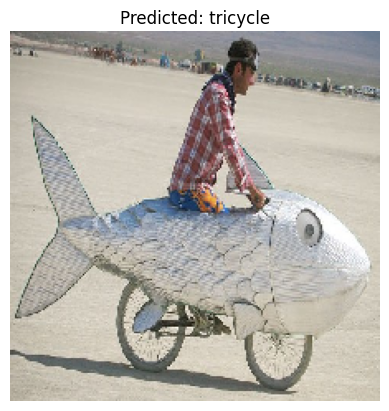

In [5]:

# 이미지 출력 w. 예측 결과
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {decode_predictions(preds, top=1)[0][0][1]}")
plt.show()


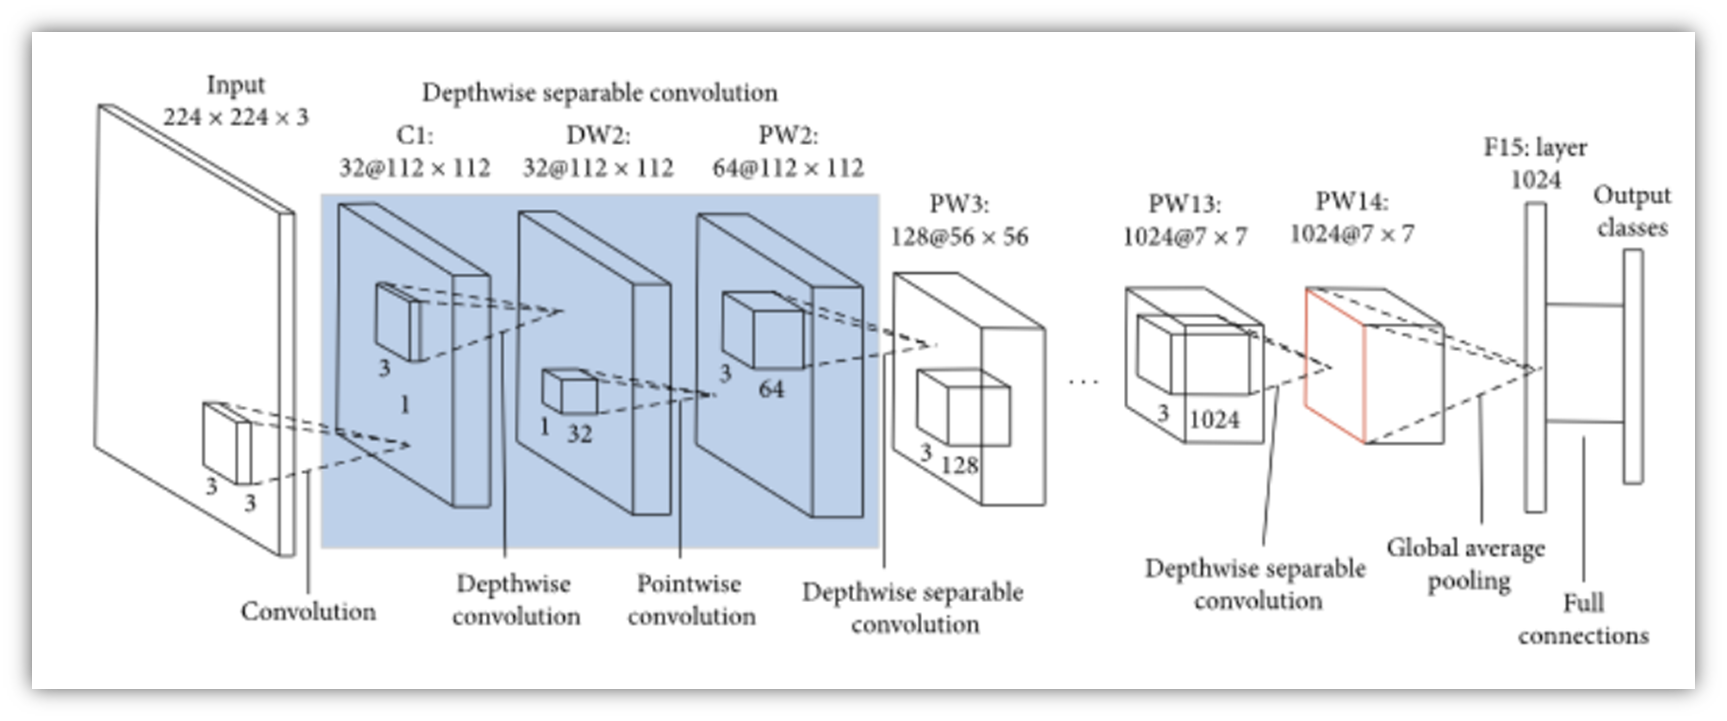

In [6]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [7]:
# 모델 크기 확인
model_size = model.count_params()
print(f"MobileNet 모델의 파라미터 수: {model_size}")

MobileNet 모델의 파라미터 수: 4253864
